In [1]:
############## https://www.kaggle.com/c/covid19-local-us-ca-forecasting-week-1/overview
############## https://machinelearningmastery.com/multi-output-regression-models-with-python/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('ca_train.csv')
test_data  = pd.read_csv('ca_test.csv')
sample = pd.read_csv('ca_submission.csv')

In [3]:
train_data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0


In [4]:
train_data.shape

(63, 8)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              63 non-null     int64  
 1   Province/State  63 non-null     object 
 2   Country/Region  63 non-null     object 
 3   Lat             63 non-null     float64
 4   Long            63 non-null     float64
 5   Date            63 non-null     object 
 6   ConfirmedCases  63 non-null     float64
 7   Fatalities      63 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ KB


In [6]:
train_data['Province/State'].value_counts()

California    63
Name: Province/State, dtype: int64

In [7]:
train_data['Lat'].value_counts()

36.1162    63
Name: Lat, dtype: int64

In [8]:
train_data['Country/Region'].value_counts() 

US    63
Name: Country/Region, dtype: int64

<AxesSubplot:xlabel='ConfirmedCases', ylabel='Count'>

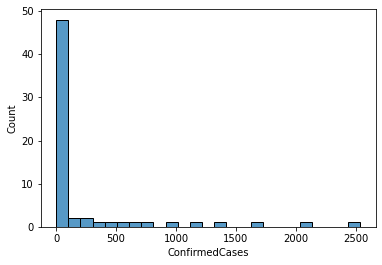

In [9]:
sns.histplot(train_data['ConfirmedCases'],bins=25)

In [10]:
train_data['ConfirmedCases'].value_counts()

0.0       48
557.0      1
1364.0     1
144.0      1
751.0      1
282.0      1
1642.0     1
177.0      1
952.0      1
340.0      1
221.0      1
698.0      1
1177.0     1
2108.0     1
2538.0     1
426.0      1
Name: ConfirmedCases, dtype: int64

In [11]:
train_data['Fatalities'].value_counts()

0.0     48
4.0      2
24.0     1
23.0     1
12.0     1
3.0      1
7.0      1
13.0     1
39.0     1
30.0     1
2.0      1
5.0      1
6.0      1
18.0     1
50.0     1
Name: Fatalities, dtype: int64

<AxesSubplot:xlabel='Fatalities', ylabel='Count'>

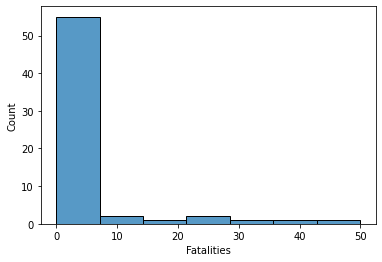

In [12]:
sns.histplot(train_data['Fatalities'])

In [13]:
train_data['Date']

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
58    2020-03-20
59    2020-03-21
60    2020-03-22
61    2020-03-23
62    2020-03-24
Name: Date, Length: 63, dtype: object

In [14]:
#### NOte data has been provided for 22 jan 2020 to 24 march 2020 for Californica US.

In [15]:
train_data

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0
...,...,...,...,...,...,...,...,...
58,59,California,US,36.1162,-119.6816,2020-03-20,1177.0,23.0
59,60,California,US,36.1162,-119.6816,2020-03-21,1364.0,24.0
60,61,California,US,36.1162,-119.6816,2020-03-22,1642.0,30.0
61,62,California,US,36.1162,-119.6816,2020-03-23,2108.0,39.0


In [16]:
train_data.corr()

,Id,Lat,Long,ConfirmedCases,Fatalities
Id,1.000000,NaN,NaN,0.617527,0.595676
Lat,NaN,NaN,NaN,NaN,NaN
Long,NaN,NaN,NaN,NaN,NaN
ConfirmedCases,0.617527,NaN,NaN,1.000000,0.997410
Fatalities,0.595676,NaN,NaN,0.997410,1.000000


In [17]:
######### Note there is high correlation between ConfirmedCases and Fatalities

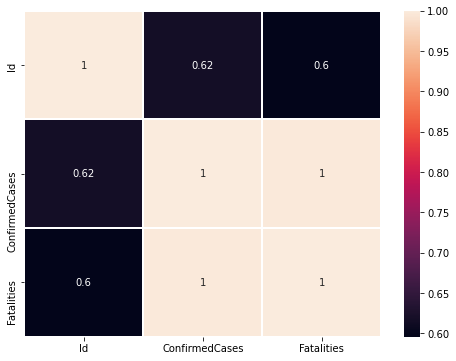

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(train_data[['Id','ConfirmedCases','Fatalities']].corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [19]:
train_data.loc[train_data['Fatalities'] == 0.0]

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0
5,6,California,US,36.1162,-119.6816,2020-01-27,0.0,0.0
6,7,California,US,36.1162,-119.6816,2020-01-28,0.0,0.0
7,8,California,US,36.1162,-119.6816,2020-01-29,0.0,0.0
8,9,California,US,36.1162,-119.6816,2020-01-30,0.0,0.0
9,10,California,US,36.1162,-119.6816,2020-01-31,0.0,0.0


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Fatalities'>

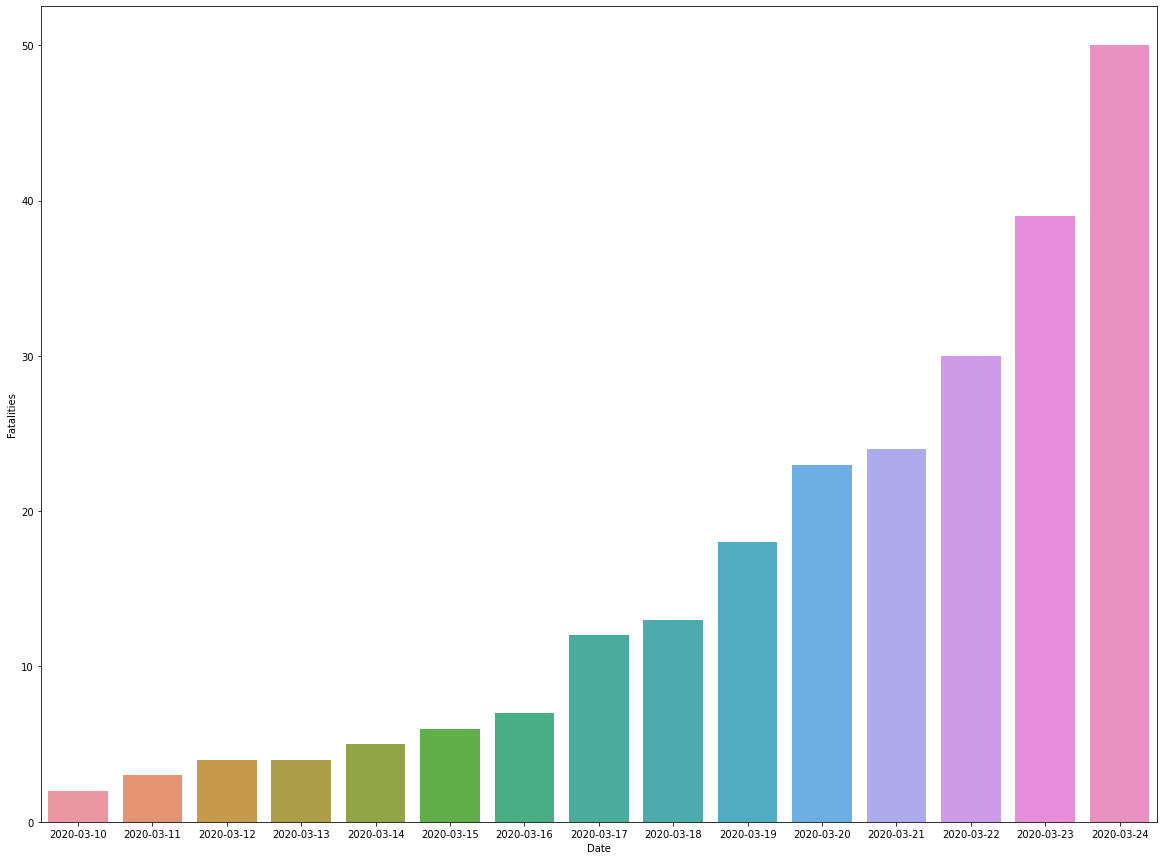

In [20]:
fig, ax = plt.subplots(figsize=(20,15))
sns.barplot(train_data.loc[train_data['Date'] > '2020-03-09','Date'],train_data.loc[train_data['Fatalities'] != 0.0, 'Fatalities'])

In [21]:
train_data.loc[train_data['ConfirmedCases'] == 0.0]

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0
1,2,California,US,36.1162,-119.6816,2020-01-23,0.0,0.0
2,3,California,US,36.1162,-119.6816,2020-01-24,0.0,0.0
3,4,California,US,36.1162,-119.6816,2020-01-25,0.0,0.0
4,5,California,US,36.1162,-119.6816,2020-01-26,0.0,0.0
5,6,California,US,36.1162,-119.6816,2020-01-27,0.0,0.0
6,7,California,US,36.1162,-119.6816,2020-01-28,0.0,0.0
7,8,California,US,36.1162,-119.6816,2020-01-29,0.0,0.0
8,9,California,US,36.1162,-119.6816,2020-01-30,0.0,0.0
9,10,California,US,36.1162,-119.6816,2020-01-31,0.0,0.0


<AxesSubplot:xlabel='ConfirmedCases', ylabel='Count'>

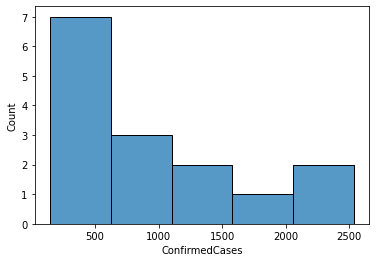

In [22]:
sns.histplot(train_data.loc[train_data['ConfirmedCases'] != 0.0, 'ConfirmedCases'])

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='ConfirmedCases'>

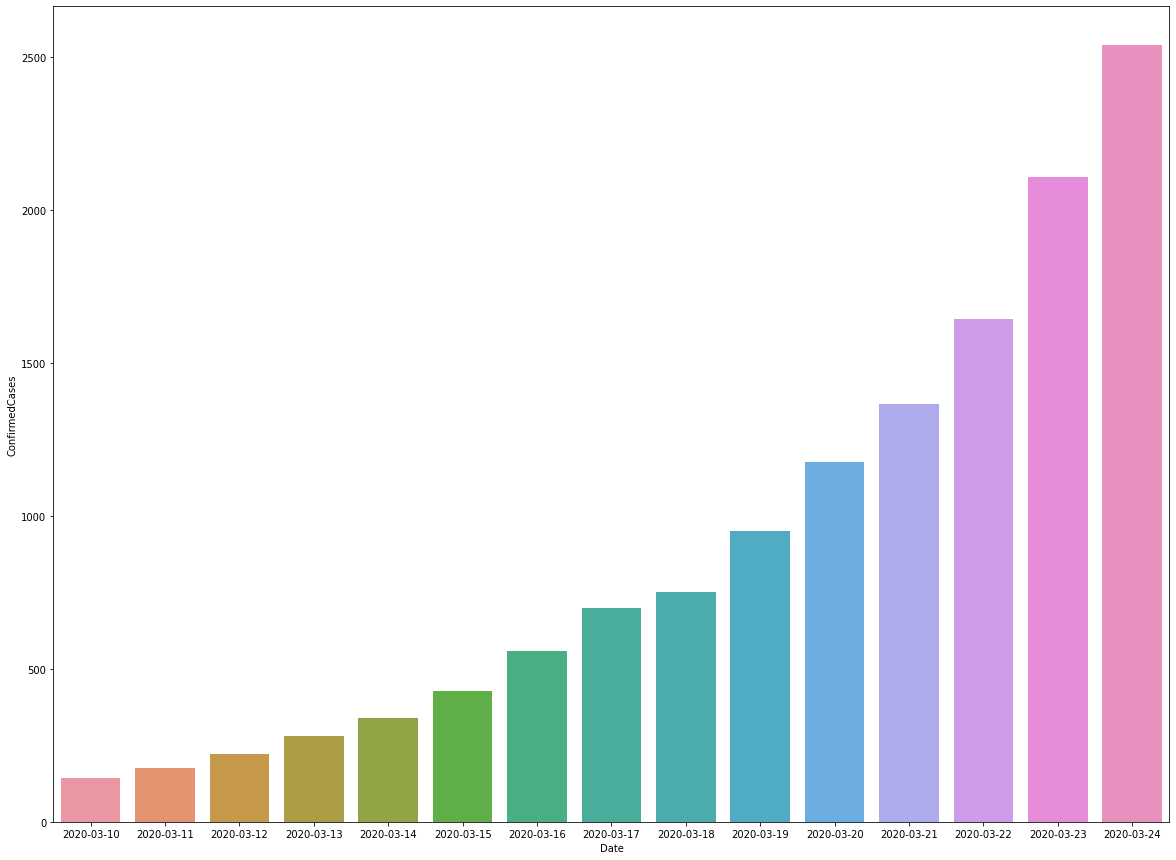

In [23]:
fig, ax = plt.subplots(figsize=(20,15))
sns.barplot(train_data.loc[train_data['Date'] > '2020-03-09','Date'],train_data.loc[train_data['ConfirmedCases'] != 0.0, 'ConfirmedCases'])

In [29]:
train_data["Date"] = train_data["Date"].apply(lambda x: x.replace("-",""))
train_data["Date"]  = train_data["Date"].astype(int)
train_data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,California,US,36.1162,-119.6816,20200122,0.0,0.0
1,2,California,US,36.1162,-119.6816,20200123,0.0,0.0
2,3,California,US,36.1162,-119.6816,20200124,0.0,0.0
3,4,California,US,36.1162,-119.6816,20200125,0.0,0.0
4,5,California,US,36.1162,-119.6816,20200126,0.0,0.0


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              63 non-null     int64  
 1   Province/State  63 non-null     object 
 2   Country/Region  63 non-null     object 
 3   Lat             63 non-null     float64
 4   Long            63 non-null     float64
 5   Date            63 non-null     int32  
 6   ConfirmedCases  63 non-null     float64
 7   Fatalities      63 non-null     float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 3.8+ KB


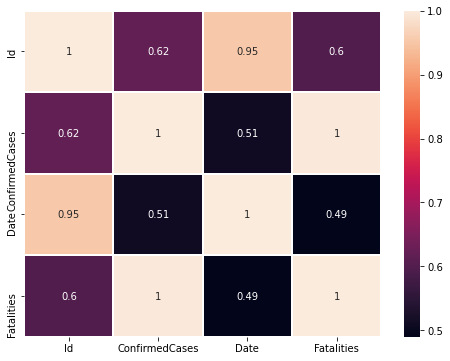

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(train_data[['Id','ConfirmedCases','Date','Fatalities']].corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [32]:
X = train_data[['Id','Date']]
y = train_data[['ConfirmedCases','Fatalities']]

In [33]:
X.head()

,Id,Date
0,1,20200122
1,2,20200123
2,3,20200124
3,4,20200125
4,5,20200126


In [41]:
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

base_lr = LogisticRegression()
chain = ClassifierChain(base_lr,  random_state=0)

chain.fit(X_train, y_train)
y_pred_lr = chain.predict(X_test)

In [42]:
y_pred_lr

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [40]:
Y_test

,ConfirmedCases,Fatalities
43,0.0,0.0
49,177.0,3.0
62,2538.0,50.0
51,282.0,4.0
32,0.0,0.0
34,0.0,0.0
29,0.0,0.0
46,0.0,0.0
11,0.0,0.0
2,0.0,0.0


In [43]:
from sklearn.multioutput import MultiOutputClassifier
model = LogisticRegression()
clf = MultiOutputClassifier(model)
clf.fit(X_train, y_train)
pred_clf_y = clf.predict(X_test)

In [44]:
pred_clf_y

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [46]:
from sklearn.tree import DecisionTreeClassifier
ex_decision = DecisionTreeClassifier()
ex_decision.fit(X_train,y_train)
y_pred_dt = ex_decision.predict(X_test)


In [47]:
y_pred_dt

array([[0.000e+00, 0.000e+00],
       [1.440e+02, 2.000e+00],
       [2.108e+03, 3.900e+01],
       [2.210e+02, 4.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [1.364e+03, 2.400e+01],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00]])